In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from PyAstronomy.pyasl import decimalYearGregorianDate, decimalYear
import matplotlib.dates as mdates
from pathlib import Path
plt.style.use("bmh")

In [53]:
grace_data = "DATA/GRACE/BRAZ/" 
p = Path(grace_data)
grace_braz = pd.read_csv("DATA/GRACE/data.csv") 
for file in p.glob("*.csv"): 
    df = pd.read_csv(file,sep=";", decimal=",") 
    grace_braz[file.name[:-4]] = df["Mean value"]

In [54]:
grace_braz.head()

,Dia,Mês,Ano,BRAZ-1.5,BRAZ-2,BRAZ-1
0,18,4,2002,3.663680,4.727888,3.831740
1,11,5,2002,-2.010708,-1.327376,-1.655113
2,17,8,2002,-15.419319,-16.103439,-15.609462
3,16,9,2002,-21.113554,-22.105926,-21.832039
4,17,10,2002,-22.717525,-23.925751,-23.308926


In [55]:
grace_braz["MEAN"] = grace_braz[['BRAZ-2', 'BRAZ-1', 'BRAZ-1.5']].mean(axis=1) 
grace_braz.head()

,Dia,Mês,Ano,BRAZ-1.5,BRAZ-2,BRAZ-1,MEAN
0,18,4,2002,3.663680,4.727888,3.831740,4.074436
1,11,5,2002,-2.010708,-1.327376,-1.655113,-1.664399
2,17,8,2002,-15.419319,-16.103439,-15.609462,-15.710740
3,16,9,2002,-21.113554,-22.105926,-21.832039,-21.683840
4,17,10,2002,-22.717525,-23.925751,-23.308926,-23.317401


In [56]:
grace_braz["DATE"] = pd.to_datetime(grace_braz.Ano*10000+grace_braz["Mês"]*100+grace_braz.Dia,format='%Y%m%d')
grace_braz.head()

,Dia,Mês,Ano,BRAZ-1.5,BRAZ-2,BRAZ-1,MEAN,DATE
0,18,4,2002,3.663680,4.727888,3.831740,4.074436,2002-04-18
1,11,5,2002,-2.010708,-1.327376,-1.655113,-1.664399,2002-05-11
2,17,8,2002,-15.419319,-16.103439,-15.609462,-15.710740,2002-08-17
3,16,9,2002,-21.113554,-22.105926,-21.832039,-21.683840,2002-09-16
4,17,10,2002,-22.717525,-23.925751,-23.308926,-23.317401,2002-10-17


In [57]:
grace_braz.drop(['Dia', 'Mês', 'Ano', 'BRAZ-2', 'BRAZ-1', 'BRAZ-1.5'],axis=1, inplace=True)
grace_braz.head()


,MEAN,DATE
0,4.074436,2002-04-18
1,-1.664399,2002-05-11
2,-15.710740,2002-08-17
3,-21.683840,2002-09-16
4,-23.317401,2002-10-17


In [58]:
grace_braz["datedecimal"] = grace_braz.DATE.apply(decimalYear) 
grace_braz.head()

,MEAN,DATE,datedecimal
0,4.074436,2002-04-18,2002.293151
1,-1.664399,2002-05-11,2002.356164
2,-15.710740,2002-08-17,2002.624658
3,-21.683840,2002-09-16,2002.706849
4,-23.317401,2002-10-17,2002.791781


In [59]:
grace_braz.set_index("DATE",inplace=True)
grace_braz.head()

,MEAN,datedecimal
DATE,,
2002-04-18,4.074436,2002.293151
2002-05-11,-1.664399,2002.356164
2002-08-17,-15.710740,2002.624658
2002-09-16,-21.683840,2002.706849
2002-10-17,-23.317401,2002.791781


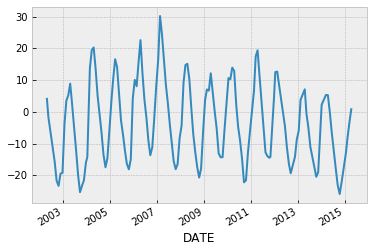

In [60]:
grace_braz.MEAN.plot()

In [61]:
grace_braz.to_csv("DATA/grace_braz.csv")